
# AAI614: Data Science & its Applications


*Notebook 1.0: Using Jupyter Lab or Notebook*

<a href="https://colab.research.google.com/github/harmanani/AAI614/blob/main/Week1/Notebook1.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A *Jupyter Notebook* is based on a client-server application that allows users to create, edit, and run notebooks via a **web browser**. A *notebook* is an executable document that is used for interactive development.  *Jupyter Notebook* runs on a computer (Linux, MacOS, or Windows) without Internet access.  It can be also installed on a remote server where it can accessed through the Internet.  A Jupyter Notebook is an essential tool that is being used by data scientists and machine learning engineers.  It is essentiual that you get get accustomed with the various commands in Jupyter prior to embarking on coding in Python for data science.   Let us walk thorugh these commands and see how this can be used.

*Jupyter Notebook* has two main components: the kernels and the dashboard.  The **kernel** is a program that runs and introspects the user’s code. In our case, the kernel will interpret Python code, but there are also kernels available for other programming languages.  The **dashboard** shows the notebook documents that we create.  

A notebook consists of cells.   A cell can be either a **code cell** or a **markdown cell**.

A code cell contains actual code that we would like to execute.  We can either specify a cell as a *code cell* using the pulldown menu in the toolbar  or using the the short cut is **Esc - y**.  A code is executed by hitting Enter while holding down the Shift key (denoted **Shift + Enter**).  Code cells are executed in the order we **Shift+Enter** them. A markdown cell uses **markdown** which is a lightweight Markup language with a plain text syntax that was developed by John Gruber in 2004.  Markdown is designed to be as easy-to-read and easy-to-write as possible.  In fact, this cell uses markup.  We will not be able to go over the markdown language at length but it is recommended that you do.  Let us see an example on how we use *code cells* and *markdown cells.*

## Starting Jupyter Notebooks

If you would like to use *Jupyter Notebook* on your own PC, run the following command:

<blockquote> jupyter notebook

You would see the following address: http://localhost:8888 at the browser tab as shown below: ![image.png](attachment:94c23646-bbfd-45e2-8fc9-1ddaf5aa730d.png)

## Let us try it out

A markdown cell is typically used to document the code and explain the steps.  They can be also used to analyze the results.  let us see the below examples:

Let us start by importing the needed *numpy* and *matplotlib*

In [1]:
import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt

Let us try to *linearly* fit a set of data points using $\hat{y} = x * m + b$ (notice the look if the equation).  This means we need to determine the appropriate valuye for **b** and **m**:


In [2]:
b = 14.45 # 14.45  # -2 to start, change me please
m = 5.12 # 5.12  # 40 to start, change me please

Let us use the following sample data:

In [3]:
x = np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9])
y = np.array([10, 20, 25, 30, 40, 45, 40, 50, 60, 55])
y_hat = x * m + b

Let us see how the line fits using a plot:

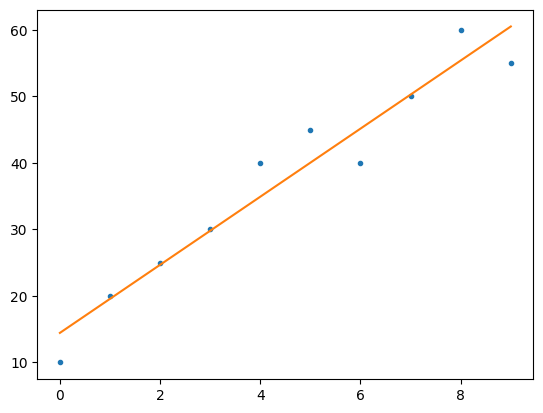

In [4]:
plt.plot(x, y, '.')
plt.plot(x, y_hat, '-')
plt.show()

Let us see what the loss is:

In [5]:
print("Loss:", np.sum((y - y_hat)**2)/len(x))

Loss: 14.87890000000001


Now, let us determine a and b automtically using the Python function **polyfit**:

In [6]:
model = polyfit(x,y,1)
print(model)

[14.45454545  5.12121212]


Try it again using the above values and see what happens!

# Before we go, let's talk about magic functions!

## Running External Code: ``%run``
As you begin developing more extensive code, you will likely find yourself working in both IPython for interactive exploration, as well as a text editor to store code that you want to reuse.
Rather than running this code in a new window, it can be convenient to run it within your IPython session.
This can be done with the ``%run`` magic.

For example, imagine you've created a ``myscript.py`` file with the following contents:

```python
#-------------------------------------
# file: myscript.py

def square(x):
    """square a number"""
    return x ** 2

for N in range(1, 4):
    print(N, "squared is", square(N))
```

You can execute this from your IPython session as follows:

```ipython
In [6]: %run myscript.py
1 squared is 1
2 squared is 4
3 squared is 9
```

Note also that after you've run this script, any functions defined within it are available for use in your IPython session:

```ipython
In [7]: square(5)
Out[7]: 25
```

There are several options to fine-tune how your code is run; you can see the documentation in the normal way, by typing **``%run?``** in the IPython interpreter.

## Timing: %timeit

The %timeit times the execution of a Python statement or expression.

In [7]:
%timeit sum(range(100))

1.41 μs ± 246 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


Another more complex example:

In [8]:
%%timeit
total = 0
for i in range(1000):
    for j in range(1000):
        total += i * (-1) ** j

265 ms ± 25.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Profiling Full Scripts: %prun

%prun allows the programmer to use a profiler.  Let us see a quick example by defining a simple function that does some calculations:

In [9]:
def sum_of_lists(N):
    total = 0
    for i in range(5):
        L = [j ^ (j >> i) for j in range(N)]
        total += sum(L)
    return total

In [10]:
%prun sum_of_lists(1000000)

         179 function calls (176 primitive calls) in 0.903 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.635    0.635    0.669    0.669 3519952779.py:1(sum_of_lists)
        2    0.208    0.104    0.217    0.108 {built-in method select.select}
        5    0.043    0.009    0.043    0.009 {built-in method builtins.sum}
        1    0.017    0.017    0.685    0.685 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
        3    0.000    0.000    0.903    0.301 base_events.py:1909(_run_once)
        3    0.000    0.000    0.000    0.000 events.py:86(_run)
        2    0.000    0.000    0.217    0.108 selectors.py:319(select)
        2    0.000    0.000    0.000    0.000 traitlets.py:3631(set)
        2    0.000    0.000    0.000    0.000 traitlets.py:718(_validate)
        3    0.000    0.000    0.000    0.000 {method 'run' of '_contextvars.Cont

The above result is a table that indicates, in order of total time on each function call, where the execution is spending the most time. In this case, the bulk of execution time is in the list comprehension inside sum_of_lists. From here, we could start thinking about what changes we might make to improve the performance in the algorithm.

## Writing the Content of a Cell to a File: %%writefile

What if you want to write the content of a cell to a file?  Easy.  We can use the **%%writefile** magic function.  Make sure it is the first line in the cell!

In [11]:
%%writefile sum_of_lists.py
def sum_of_lists(N):
    total = 0
    for i in range(5):
        L = [j ^ (j >> i) for j in range(N)]
        total += sum(L)
    return total

Writing sum_of_lists.py


The above example writes the content of a cell to the file **sum_of_lists.py**

## Help on Magic Functions: ``?``, ``%magic``, and ``%lsmagic``

For a quick and simple list of all available magic functions, type this:

In [12]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %code_wrap  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %mamba  %matplotlib  %micromamba  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%code_wrap  %%debug  %%file  %%html  %%javascript  %%js  %%latex 

If all fails, you can get help using the IPython magic functions docstrings, and this useful
documentation can be accessed in the standard manner.  So, for example, to read the documentation of the ``%timeit`` magic simply type this:

In [13]:
%timeit?

Docstring:
Time execution of a Python statement or expression

Usage, in line mode:
  %timeit [-n<N> -r<R> [-t|-c] -q -p<P> -o] statement
or in cell mode:
  %%timeit [-n<N> -r<R> [-t|-c] -q -p<P> -o] setup_code
  code
  code...

Time execution of a Python statement or expression using the timeit
module.  This function can be used both as a line and cell magic:

- In line mode you can time a single-line statement (though multiple
  ones can be chained with using semicolons).

- In cell mode, the statement in the first line is used as setup code
  (executed but not timed) and the body of the cell is timed.  The cell
  body has access to any variables created in the setup code.

Options:
-n<N>: execute the given statement <N> times in a loop. If <N> is not
provided, <N> is determined so as to get sufficient accuracy.

-r<R>: number of repeats <R>, each consisting of <N> loops, and take the
average result.
Default: 7

-t: use time.time to measure the time, which is the default on Unix.
Thi

Documentation for other functions can be accessed similarly.  To access a general description of available magic functions, including some examples, you can type this:

In [14]:
%magic


IPython's 'magic' functions

The magic function system provides a series of functions which allow you to
control the behavior of IPython itself, plus a lot of system-type
features. There are two kinds of magics, line-oriented and cell-oriented.

Line magics are prefixed with the % character and work much like OS
command-line calls: they get as an argument the rest of the line, where
arguments are passed without parentheses or quotes.  For example, this will
time the given statement::

        %timeit range(1000)

Cell magics are prefixed with a double %%, and they are functions that get as
an argument not only the rest of the line, but also the lines below it in a
separate argument.  These magics are called with two arguments: the rest of the
call line and the body of the cell, consisting of the lines below the first.
For example::

        %%timeit x = numpy.random.randn((100, 100))
        numpy.linalg.svd(x)

will time the execution of the numpy svd routine, running the assignment 